# Nearest Neighbours methods <a class="anchor" id="nearestneighbours"></a>

Nearest Neighbour methods provide some very staightforward methods for supervised machine learning

## Brute force implementation

 1. Set the number of nearest neighbours, $K$
 1. To predict one new sample, calculate its distance to all known training samples
 1. Order the list of distances
 1. Select $K$ nearest samples and use them for prediction
    - In case of classification, the result is the mode of the K-nearest set
    - In case of regression, the result is for example the average of the K-nearest set


- The asymptotic execution time of the brute for implementation is $\mathcal{O}[D N^2]$ which makes it unsuitable for large data sets and high dimesional problems
- To extend NN method, the neighbourhood information can be encoded in a tree structure to reduce the number of distances which need to be calculated. For example a KD-Tree implementation can be calculated in $\mathcal{O}[D N \log ({N})]$ time.
- The Ball-Tree implementation makes algorith even more suitable in high-dimensional problems 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Teach nearest neighbors classifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

scaler=StandardScaler()
Xs=scaler.fit_transform(X)

n_neighbors = 5
knn=neighbors.KNeighborsClassifier(n_neighbors)
knn.fit(Xs,y)

# Predict the classes
yh=knn.predict(Xs)
print(yh)

[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 0 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 0 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 1 2 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


In [3]:
# Compare the the prediction with true values using Confusion matrix and R2-score
import sklearn.metrics as metrics
print(metrics.confusion_matrix(y_true=y, y_pred=yh, labels=None, sample_weight=None))
print("The accuracy of KNN is..... %4.2f" % metrics.accuracy_score(y_true=y, y_pred=yh))


[[32  1  1]
 [ 0 33  0]
 [ 2  0 31]]
The accuracy of KNN is..... 0.96


### Pipelining 
In Scikit Learn, all methods are build using the same interface. This makes it easier to build larger machine learning systems by combining different stages together as pipelines. 

For example, the scaling of features, dimensionality reduction, and sclassification can be combined as a single pipeline. This is especially usefull, when several datasets (validation data, testing data, production data, etc) needs to be fed through the same stages.

In [4]:
from sklearn.pipeline import Pipeline
n_neighbors=5
pipeline=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNN', neighbors.KNeighborsClassifier(n_neighbors))
    ])
pipeline.fit(X,y)
yh=pipeline.predict(X)

print(metrics.confusion_matrix(y_true=y, y_pred=yh))
print(metrics.accuracy_score(y_true=y, y_pred=yh))


[[32  1  1]
 [ 0 33  0]
 [ 2  0 31]]
0.96


## Visualization of the decision boundaries

In [5]:
# Skip this code if you are not interested

from matplotlib.colors import ListedColormap
def plotDB(predictor, X, y, steps=100):
    """Plots the Decision Boundary
        pipe = classification pipeline
        X is the training data used for training the classifier
        steps = number of x and y steps in calculating the boundary
    """
    # Create color map
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    hx = (x_max - x_min)/steps
    hy = (y_max - y_min)/steps
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx),
                         np.arange(y_min, y_max, hy))
    Z = predictor.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary")
    
# Display the support vectors of support vector machine
def DisplaySupportVectors(X,y,svc):
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    colors="rgb"
    for i in svc.support_:
        a,b=X[i]
        c=y[i]
        plt.plot(a,b, '%sx' % (colors[c]), ms=8)


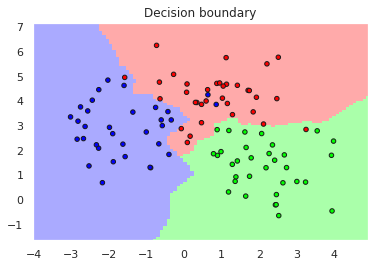

In [6]:
plotDB(pipeline, X, y)

### Variations
 - Nearest Centroid classifier
   - The training data is replaced with a centroid of each class
 - Neigborhood Component Analysis (NCA)
   - The coordinate axis are changed so that the separation between the classes is maximized
   - This supervised dimensionality reduction method can be used for exploring the data
   - It can also improve the performance of NN classifiers or regressors

## Nearest Centroid Classifier
Nearest centroid classifier does not need to store all training data, thats why it is also faster to predict.

0.91


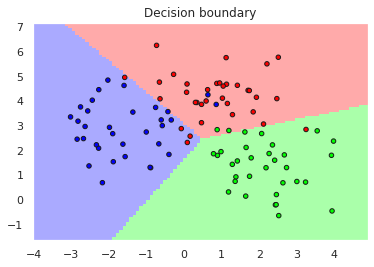

In [7]:
from sklearn.neighbors import NearestCentroid
pipelineCentroid=Pipeline([
        ('Scaling', StandardScaler()),
        ('KNC', NearestCentroid())
    ])
pipelineCentroid.fit(X,y)
yh=pipelineCentroid.predict(X)
print(metrics.accuracy_score(y_true=y, y_pred=yh))
plotDB(pipelineCentroid, X, y)


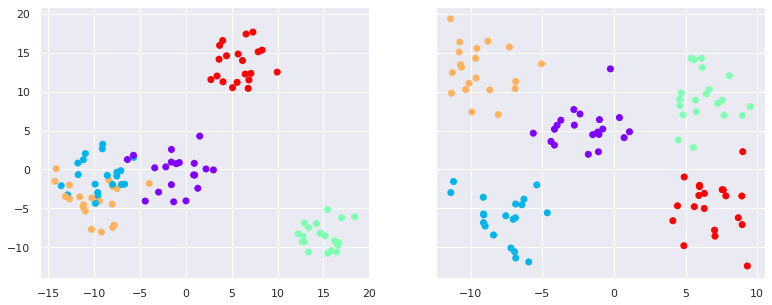

In [8]:
# First, create a random dataset in 6-dimensional space
X6d,y6d=datasets.make_blobs(n_samples=100, centers=5, n_features=6, random_state=0, cluster_std=2)

from sklearn.decomposition import PCA
from sklearn.neighbors import  NeighborhoodComponentsAnalysis

# Two dimensional PCA for comparison
pca=PCA(n_components=2)
pc=pca.fit_transform(X6d)

# Two dimensional supervised NCA 
nca = NeighborhoodComponentsAnalysis(n_components=2)
nc=nca.fit_transform(X6d,y6d)

fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(13,5), sharey=True)
ax[0].scatter(pc[:,0], pc[:,1], c=y6d, cmap='rainbow')
ax[1].scatter(nc[:,0], nc[:,1], c=y6d, cmap='rainbow')


## Summary
* kNN is simple classification method
* kNN supports non-linear and complex decision boundaries
* kNN needs all training samples for prediction, and can therefore require a lot of memory and be slow in prediction
* Nearest centroid method stores only centroids, and is therefore memory efficient and fast as compared with kNN, but the decision boundaries are linear
* NCA is a supervised dimensionality reduction method, which performs sometimes better than unsupervised dimensionality reduction methods, such as PCA
* Both NCA and PCA can be used as a preprocessing step before kNN classification